In [85]:
import numpy as np
import pandas as pd
import pathlib 
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [86]:

data_dir_train = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [87]:


label_folder=[os.path.join(data_dir_train,label) for label in os.listdir(data_dir_train)]
label_folder_test=[os.path.join(data_dir_test,label) for label in os.listdir(data_dir_test)]


In [88]:
label_folder_test

['../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis',
 '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma',
 '../inpu

In [89]:
img=[]
labels=[]
a=1
for label in label_folder:
    for image_name in os.listdir(label):
        image_path=os.path.join(label,image_name)
        img.append(cv.imread(image_path,0))
        labels.append(a)
    a+=1



In [90]:
img_test=[]
labels_test=[]
a=1
for label in label_folder_test:
    for image_name in os.listdir(label):
        image_path=os.path.join(label,image_name)
        img_test.append(cv.imread(image_path,0))
        labels_test.append(a)
    a+=1

In [91]:
print(len(labels))
print(len(img))
print(len(labels_test))
print(len(img_test))


2239
2239
118
118


Text(0.5, 1.0, '1')

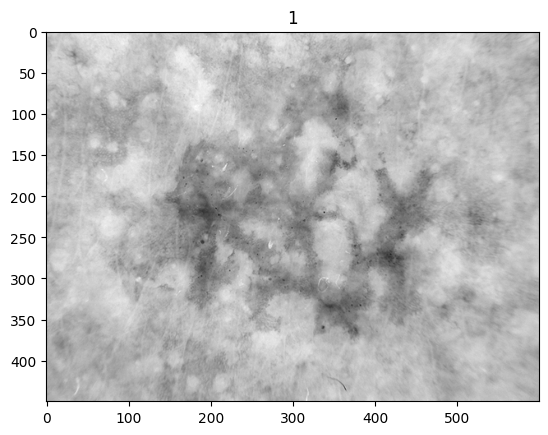

In [92]:
plt.imshow(img[1],cmap='gray')
plt.title(labels[1])

In [93]:
print(img[1].shape)

(450, 600)


In [94]:
print(img[1])

[[155 151 149 ... 144 144 144]
 [151 151 149 ... 144 142 141]
 [150 150 148 ... 142 142 141]
 ...
 [134 135 135 ... 136 136 134]
 [137 137 133 ... 135 134 134]
 [136 137 134 ... 136 134 134]]


In [95]:
img[1]

array([[155, 151, 149, ..., 144, 144, 144],
       [151, 151, 149, ..., 144, 142, 141],
       [150, 150, 148, ..., 142, 142, 141],
       ...,
       [134, 135, 135, ..., 136, 136, 134],
       [137, 137, 133, ..., 135, 134, 134],
       [136, 137, 134, ..., 136, 134, 134]], dtype=uint8)

In [96]:
resized_img = [cv.resize(img[i], (45, 60), interpolation=cv.INTER_AREA) for i in range(len(img))]

In [97]:
resized_img_test = [cv.resize(img_test[i], (45, 60), interpolation=cv.INTER_AREA) for i in range(len(img_test))]

In [98]:
imgs=[resized_img[i].reshape((1,-1)) for i in range(len(resized_img))]
imgs_test=[resized_img_test[i].reshape((1,-1)) for i in range(len(resized_img_test))]

In [99]:
print(imgs[5].shape)

(1, 2700)


In [100]:
labels=np.array(labels)

In [101]:
imgs=np.array(imgs)
imgs_test=np.array(imgs_test)

In [102]:
imgs.shape
imgs_test.shape

(118, 1, 2700)

In [103]:
imgs=imgs.reshape(2700,-1)
imgs_test=imgs_test.reshape(2700,-1)


In [104]:
imgs.shape
imgs_test.shape

(2700, 118)

In [105]:
# X_train_trans=X_train.T
# X_test_trans=X_test.T


In [106]:
print(imgs[1].shape)

(2239,)


In [107]:
imgs[2]

array([126, 121, 142, ...,  94,  83,  76], dtype=uint8)

In [108]:
print(type(imgs))

<class 'numpy.ndarray'>


In [109]:
print(imgs[1].shape)

(2239,)


In [110]:
X_train_trans = imgs/255.
X_test_trans=imgs_test/255


In [111]:
X_train_trans[:,0].shape

(2700,)

In [112]:
print(X_train_trans[0])

[0.54901961 0.52941176 0.49411765 ... 0.58039216 0.56470588 0.56470588]


In [113]:
labels.shape

(2239,)

In [114]:
# Deep neural network 3 layer
def init_params():#init parameter
    W1 = np.random.rand(10, 2700) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3
def ReLU(Z):# activation function for each hidden layer
    return np.maximum(Z, 0)

def softmax(Z):#activation function for output layer
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):#forward deep neural network
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):#Encode input use Onehot encode
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):# bacward propagation
    m=Y.size
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):# update parameter for each Epoch
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3  
    return W1,b1,W2,b2,W3,b3


In [115]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, epochs, lr):
    W1, b1, W2, b2 , W3,b3= init_params()
    acc=[]
    for i in range(epochs):
        Z1, A1, Z2, A2,Z3,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
        dW1, db1, dW2, db2,dw3,db3 = backward_prop(Z1, A1, Z2, A2,Z3,A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2,W3,b3 = update_params(W1, b1, W2, b2,W3,b3, dW1, db1, dW2, db2,dw3,db3, lr)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
            acc.append(get_accuracy(predictions, Y))
    return W1, b1, W2, b2,W3,b3,acc


In [120]:
w1,b1,w2,b2,w3,b3,acc=gradient_descent(X_train_trans,labels,epochs=1000,lr=0.01)

Iteration:  0
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
0.15944618133095131
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  10
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
0.2916480571683787
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  20
[2 2 2 ... 9 9 9] [1 1 1 ... 9 9 9]
0.2675301473872264
[2 2 2 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  30
[2 2 2 ... 9 9 9] [1 1 1 ... 9 9 9]
0.26887003126395714
[2 2 2 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  40
[2 9 2 ... 9 9 9] [1 1 1 ... 9 9 9]
0.2791424743188924
[2 9 2 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  50
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
0.29030817329164804
[9 9 9 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  60
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
0.3104064314426083
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  70
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
0.3407771326485038
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  80
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
0.3555158552925413
[1 1 1 ... 9 9 9] [1 1 1 ... 9 9 9]
Iteration:  90
[1 1 1 ... 9 9 9] [1 1 1 ... 

In [121]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Accuracy Deep Neural Network build from scratch')

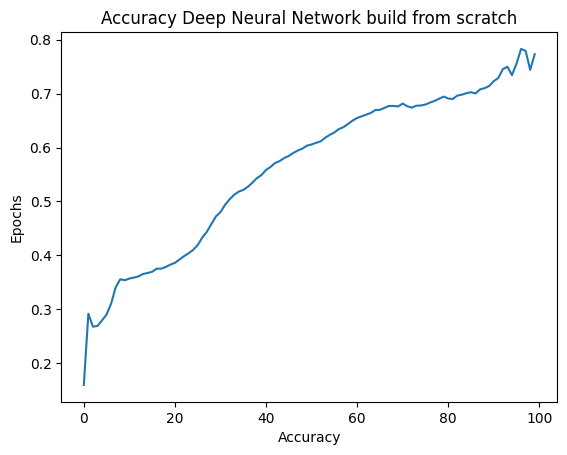

In [129]:
plt.plot(acc)
plt.xlabel("Accuracy")
plt.ylabel('Epochs')
plt.title('Accuracy Deep Neural Network build from scratch')